In [6]:
import os
os.chdir('/home/user/src')

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from omegaconf import OmegaConf
import hydra
cfg = OmegaConf.load('/home/user/src/configs/default.yaml')
dl = hydra.utils.instantiate(cfg.dataset,train_val_key="train")

++++++++++++++++++++++++
Number of sampels for train
AnnualCrop --> 175
HerbaceousVegetation --> 164
Industrial --> 132
PermanentCrop --> 123
River --> 121
Forest --> 143
Highway --> 114
Pasture --> 131
Residential --> 159
SeaLake --> 138


# check data distribution

In [29]:
H = np.zeros((13,200))
bins=np.linspace(0,1,201)

for i in range(len(dl)):
    
    batch = dl.__getitem__(i)
    s2=batch["s2"]
    
    for c in range(s2.shape[0]):
        data = s2[c].flatten()
        H[c] += np.histogram(data,bins=bins)[0]

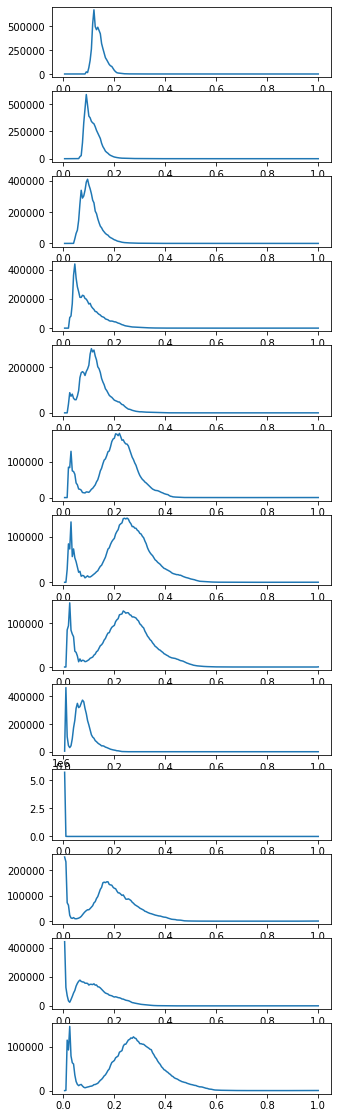

In [37]:
f,loax = plt.subplots(13,1,figsize=(5,20))
for c in range(13):
    loax[c].plot(bins[1:],H[c])
plt.show()

# check label banlance

In [25]:
all_labels = []
for i in range(len(dl)):
    batch = dl.__getitem__(i)
    l=batch["label"]
    all_labels.append(l.item())

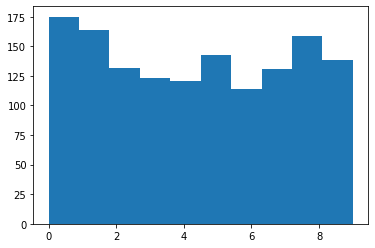

In [27]:
plt.hist(all_labels)
plt.show()